In [144]:
from pathlib import Path
from matplotlib import pyplot as plt

from fastai.vision.all import (
    DataBlock, setup_aug_tfms, Pipeline, ImageBlock, CategoryBlock, parent_label, Resize)

img_path = Path('../input/plant-pathology-2021-fgvc8/train_images/801f78399a44e7af.jpg')
img = PIL.Image.open(img_path)

# Crop image using fastai Pipline. 
datablock = DataBlock(blocks=(ImageBlock(), CategoryBlock()), get_y=parent_label, item_tfms=Resize(460))
dataloaders = datablock.dataloaders([img_path]*100, bs=8)
x,y = dls1.train.one_batch()

# Convert into Numpy for display
img_cropped = x[0].data.numpy().transpose(1, 2, 0)

# Apply transformations to resized image
tfms = setup_aug_tfms([
    Rotate(draw=30, p=1, size=224),
    Zoom(draw=1.2, p=1., size=224),
    Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
img_aug = Pipeline(tfms)(tensor(x))[0].data.numpy().transpose(1, 2, 0)

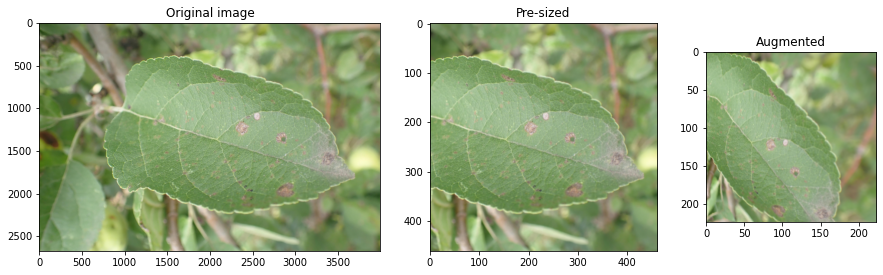

In [145]:
_, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15), gridspec_kw={'width_ratios': [3, 2, 1.5]})

ax0.imshow(img)
ax1.imshow(img_cropped)
ax2.imshow(img_aug)

ax0.title.set_text('Original image')
ax1.title.set_text('Pre-sized')
ax2.title.set_text('Augmented')